In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('prosperLoanData.csv')
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14-08-2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17-12-2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13-08-2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


# Exploratort Data Analysis 

In [3]:
df.shape

(113937, 81)

In [4]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [5]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

ListingKey : ['1021339766868145413AB3B' '10273602499503308B223C1'
 '0EE9337825851032864889A' ... 'E6E13596170052029692BB1'
 'E6EB3531504622671970D9E' 'E6ED3600409833199F711B7']
ListingNumber : [ 193129 1209647   81716 ... 1069178  539056 1140093]
ListingCreationDate : ['09:29.3' '28:07.9' '00:47.1' ... '36:01.0' '02:53.3' '02:44.4']
CreditGrade : ['C' nan 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC']
Term : [36 60 12]
LoanStatus : ['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']
ClosedDate : ['14-08-2009 00:00' nan '17-12-2009 00:00' ... '25-10-2006 00:00'
 '08-12-2005 00:00' '25-11-2005 00:00']
BorrowerAPR : [0.16516 0.12016 0.28269 ... 0.22674 0.3477  0.19543]
BorrowerRate : [0.158  0.092  0.275  ... 0.2037 0.2309 0.0739]
LenderYield : [0.138  0.082  0.24   ... 0.0494 0.2209 0.0579]
EstimatedEffectiveYield : [   nan 0

<AxesSubplot:>

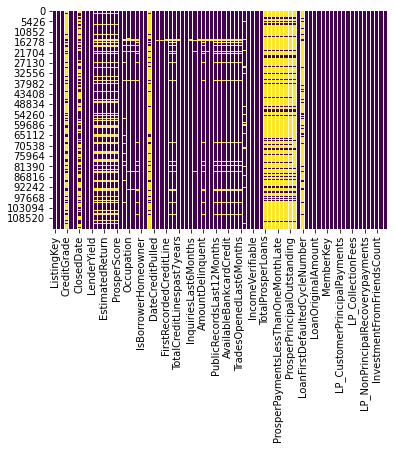

In [6]:
#visualising the missing values
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [7]:
# Duplicates data entry in loan data
df.duplicated().sum()

0

In [8]:
#checking the captalization
df['LoanStatus'].value_counts(dropna=False)

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

# Handling Missing Values 

In [10]:
categorical=df.select_dtypes("object")
categorical

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,09:29.3,C,Completed,14-08-2009 00:00,NaN,CO,Other,Self-employed,NaN,41:46.8,11-10-2001 00:00,"$25,000-49,999",E33A3400205839220442E84,12-09-2007 00:00,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,28:07.9,NaN,Current,NaN,A,CO,Professional,Employed,NaN,27-02-2014 08:28,18-03-1996 00:00,"$50,000-74,999",9E3B37071505919926B1D82,03-03-2014 00:00,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,00:47.1,HR,Completed,17-12-2009 00:00,NaN,GA,Other,Not available,783C3371218786870A73D20,09:10.1,27-07-2002 00:00,Not displayed,6954337960046817851BCB2,17-01-2007 00:00,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,02:35.0,NaN,Current,NaN,A,GA,Skilled Labor,Employed,NaN,22-10-2012 11:02,28-02-1983 00:00,"$25,000-49,999",A0393664465886295619C51,01-11-2012 00:00,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,38:39.1,NaN,Current,NaN,D,MN,Executive,Employed,NaN,14-09-2013 18:38,20-02-2004 00:00,"$100,000+",A180369302188889200689E,20-09-2013 00:00,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,55:02.7,NaN,Current,NaN,C,IL,Food Service Management,Employed,NaN,14-04-2013 05:54,01-09-1997 00:00,"$50,000-74,999",9BD7367919051593140DB62,22-04-2013 00:00,Q2 2013,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,42:55.3,NaN,FinalPaymentInProgress,NaN,A,PA,Professional,Employed,NaN,03-11-2011 20:42,17-01-1992 00:00,"$75,000-99,999",62D93634569816897D5A276,07-11-2011 00:00,Q4 2011,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,49:12.7,NaN,Current,NaN,D,TX,Other,Employed,NaN,13-12-2013 05:49,25-02-2002 00:00,"$25,000-49,999",DD1A370200396006300ACA0,23-12-2013 00:00,Q4 2013,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,18:26.6,NaN,Completed,13-08-2013 00:00,C,GA,Food Service,Full-time,NaN,14-11-2011 13:18,01-12-1993 00:00,"$25,000-49,999",589536350469116027ED11B,21-11-2011 00:00,Q4 2011,A33834861822272782621C8


In [11]:
continuous=df.select_dtypes("number")
continuous

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [12]:
categorical.isna().sum()

ListingKey                      0
ListingCreationDate             0
CreditGrade                 84984
LoanStatus                      0
ClosedDate                  58848
ProsperRating (Alpha)       29084
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
GroupKey                   100596
DateCreditPulled                0
FirstRecordedCreditLine       697
IncomeRange                     0
LoanKey                         0
LoanOriginationDate             0
LoanOriginationQuarter          0
MemberKey                       0
dtype: int64

In [13]:
categorical=categorical.fillna(categorical.mode().iloc[0])

In [14]:
categorical

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,09:29.3,C,Completed,14-08-2009 00:00,C,CO,Other,Self-employed,783C3371218786870A73D20,41:46.8,11-10-2001 00:00,"$25,000-49,999",E33A3400205839220442E84,12-09-2007 00:00,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,28:07.9,C,Current,04-03-2014 00:00,A,CO,Professional,Employed,783C3371218786870A73D20,27-02-2014 08:28,18-03-1996 00:00,"$50,000-74,999",9E3B37071505919926B1D82,03-03-2014 00:00,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,00:47.1,HR,Completed,17-12-2009 00:00,C,GA,Other,Not available,783C3371218786870A73D20,09:10.1,27-07-2002 00:00,Not displayed,6954337960046817851BCB2,17-01-2007 00:00,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,02:35.0,C,Current,04-03-2014 00:00,A,GA,Skilled Labor,Employed,783C3371218786870A73D20,22-10-2012 11:02,28-02-1983 00:00,"$25,000-49,999",A0393664465886295619C51,01-11-2012 00:00,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,38:39.1,C,Current,04-03-2014 00:00,D,MN,Executive,Employed,783C3371218786870A73D20,14-09-2013 18:38,20-02-2004 00:00,"$100,000+",A180369302188889200689E,20-09-2013 00:00,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,55:02.7,C,Current,04-03-2014 00:00,C,IL,Food Service Management,Employed,783C3371218786870A73D20,14-04-2013 05:54,01-09-1997 00:00,"$50,000-74,999",9BD7367919051593140DB62,22-04-2013 00:00,Q2 2013,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,42:55.3,C,FinalPaymentInProgress,04-03-2014 00:00,A,PA,Professional,Employed,783C3371218786870A73D20,03-11-2011 20:42,17-01-1992 00:00,"$75,000-99,999",62D93634569816897D5A276,07-11-2011 00:00,Q4 2011,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,49:12.7,C,Current,04-03-2014 00:00,D,TX,Other,Employed,783C3371218786870A73D20,13-12-2013 05:49,25-02-2002 00:00,"$25,000-49,999",DD1A370200396006300ACA0,23-12-2013 00:00,Q4 2013,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,18:26.6,C,Completed,13-08-2013 00:00,C,GA,Food Service,Full-time,783C3371218786870A73D20,14-11-2011 13:18,01-12-1993 00:00,"$25,000-49,999",589536350469116027ED11B,21-11-2011 00:00,Q4 2011,A33834861822272782621C8


In [15]:
categorical.isna().sum()

ListingKey                 0
ListingCreationDate        0
CreditGrade                0
LoanStatus                 0
ClosedDate                 0
ProsperRating (Alpha)      0
BorrowerState              0
Occupation                 0
EmploymentStatus           0
GroupKey                   0
DateCreditPulled           0
FirstRecordedCreditLine    0
IncomeRange                0
LoanKey                    0
LoanOriginationDate        0
LoanOriginationQuarter     0
MemberKey                  0
dtype: int64

In [16]:
continuous=continuous.fillna(continuous.median().iloc[0])
continuous

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,0.16516,0.1580,0.1380,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,0.28269,0.2750,0.2400,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [17]:
continuous.isna().sum()

ListingNumber                  0
Term                           0
BorrowerAPR                    0
BorrowerRate                   0
LenderYield                    0
                              ..
PercentFunded                  0
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
Length: 61, dtype: int64

In [18]:
result = pd.concat([continuous, categorical], axis=1, join='inner')
display(result)

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,193129,36,0.16516,0.1580,0.1380,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,Other,Self-employed,783C3371218786870A73D20,41:46.8,11-10-2001 00:00,"$25,000-49,999",E33A3400205839220442E84,12-09-2007 00:00,Q3 2007,1F3E3376408759268057EDA
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,Professional,Employed,783C3371218786870A73D20,27-02-2014 08:28,18-03-1996 00:00,"$50,000-74,999",9E3B37071505919926B1D82,03-03-2014 00:00,Q1 2014,1D13370546739025387B2F4
2,81716,36,0.28269,0.2750,0.2400,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,Other,Not available,783C3371218786870A73D20,09:10.1,27-07-2002 00:00,Not displayed,6954337960046817851BCB2,17-01-2007 00:00,Q1 2007,5F7033715035555618FA612
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,Skilled Labor,Employed,783C3371218786870A73D20,22-10-2012 11:02,28-02-1983 00:00,"$25,000-49,999",A0393664465886295619C51,01-11-2012 00:00,Q4 2012,9ADE356069835475068C6D2
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,Executive,Employed,783C3371218786870A73D20,14-09-2013 18:38,20-02-2004 00:00,"$100,000+",A180369302188889200689E,20-09-2013 00:00,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,Food Service Management,Employed,783C3371218786870A73D20,14-04-2013 05:54,01-09-1997 00:00,"$50,000-74,999",9BD7367919051593140DB62,22-04-2013 00:00,Q2 2013,2EC435768441332602FDC15
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,Professional,Employed,783C3371218786870A73D20,03-11-2011 20:42,17-01-1992 00:00,"$75,000-99,999",62D93634569816897D5A276,07-11-2011 00:00,Q4 2011,55C4336679182766893E4FC
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,Other,Employed,783C3371218786870A73D20,13-12-2013 05:49,25-02-2002 00:00,"$25,000-49,999",DD1A370200396006300ACA0,23-12-2013 00:00,Q4 2013,0FE0370029359765342FDB5
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,Food Service,Full-time,783C3371218786870A73D20,14-11-2011 13:18,01-12-1993 00:00,"$25,000-49,999",589536350469116027ED11B,21-11-2011 00:00,Q4 2011,A33834861822272782621C8


In [19]:
result

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,193129,36,0.16516,0.1580,0.1380,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,Other,Self-employed,783C3371218786870A73D20,41:46.8,11-10-2001 00:00,"$25,000-49,999",E33A3400205839220442E84,12-09-2007 00:00,Q3 2007,1F3E3376408759268057EDA
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,Professional,Employed,783C3371218786870A73D20,27-02-2014 08:28,18-03-1996 00:00,"$50,000-74,999",9E3B37071505919926B1D82,03-03-2014 00:00,Q1 2014,1D13370546739025387B2F4
2,81716,36,0.28269,0.2750,0.2400,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,Other,Not available,783C3371218786870A73D20,09:10.1,27-07-2002 00:00,Not displayed,6954337960046817851BCB2,17-01-2007 00:00,Q1 2007,5F7033715035555618FA612
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,Skilled Labor,Employed,783C3371218786870A73D20,22-10-2012 11:02,28-02-1983 00:00,"$25,000-49,999",A0393664465886295619C51,01-11-2012 00:00,Q4 2012,9ADE356069835475068C6D2
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,Executive,Employed,783C3371218786870A73D20,14-09-2013 18:38,20-02-2004 00:00,"$100,000+",A180369302188889200689E,20-09-2013 00:00,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,Food Service Management,Employed,783C3371218786870A73D20,14-04-2013 05:54,01-09-1997 00:00,"$50,000-74,999",9BD7367919051593140DB62,22-04-2013 00:00,Q2 2013,2EC435768441332602FDC15
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,Professional,Employed,783C3371218786870A73D20,03-11-2011 20:42,17-01-1992 00:00,"$75,000-99,999",62D93634569816897D5A276,07-11-2011 00:00,Q4 2011,55C4336679182766893E4FC
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,Other,Employed,783C3371218786870A73D20,13-12-2013 05:49,25-02-2002 00:00,"$25,000-49,999",DD1A370200396006300ACA0,23-12-2013 00:00,Q4 2013,0FE0370029359765342FDB5
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,Food Service,Full-time,783C3371218786870A73D20,14-11-2011 13:18,01-12-1993 00:00,"$25,000-49,999",589536350469116027ED11B,21-11-2011 00:00,Q4 2011,A33834861822272782621C8


In [20]:
result.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,193129,36,0.16516,0.1580,0.1380,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,Other,Self-employed,783C3371218786870A73D20,41:46.8,11-10-2001 00:00,"$25,000-49,999",E33A3400205839220442E84,12-09-2007 00:00,Q3 2007,1F3E3376408759268057EDA
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,Professional,Employed,783C3371218786870A73D20,27-02-2014 08:28,18-03-1996 00:00,"$50,000-74,999",9E3B37071505919926B1D82,03-03-2014 00:00,Q1 2014,1D13370546739025387B2F4
2,81716,36,0.28269,0.2750,0.2400,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,Other,Not available,783C3371218786870A73D20,09:10.1,27-07-2002 00:00,Not displayed,6954337960046817851BCB2,17-01-2007 00:00,Q1 2007,5F7033715035555618FA612
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,Skilled Labor,Employed,783C3371218786870A73D20,22-10-2012 11:02,28-02-1983 00:00,"$25,000-49,999",A0393664465886295619C51,01-11-2012 00:00,Q4 2012,9ADE356069835475068C6D2
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,Executive,Employed,783C3371218786870A73D20,14-09-2013 18:38,20-02-2004 00:00,"$100,000+",A180369302188889200689E,20-09-2013 00:00,Q3 2013,36CE356043264555721F06C


In [21]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 78 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingNumber                        113937 non-null  int64  
 1   Term                                 113937 non-null  int64  
 2   BorrowerAPR                          113937 non-null  float64
 3   BorrowerRate                         113937 non-null  float64
 4   LenderYield                          113937 non-null  float64
 5   EstimatedEffectiveYield              113937 non-null  float64
 6   EstimatedLoss                        113937 non-null  float64
 7   EstimatedReturn                      113937 non-null  float64
 8   ProsperRating (numeric)              113937 non-null  float64
 9   ProsperScore                         113937 non-null  float64
 10  ListingCategory (numeric)            113937 non-null  int64  
 11  EmploymentSta

In [22]:
result.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,131.992040,0.192764,0.182701,153299.866132,153299.800330,153299.812069,153302.773269,153304.171753,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,8894.955388,0.074818,0.074516,261848.286590,261848.325114,261848.318241,261846.584588,261845.765840,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.132600,0.054900,0.080220,3.000000,5.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209790,0.184000,0.173000,0.195710,0.099000,0.109300,5.000000,7.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283860,0.250000,0.240000,600554.000000,600554.000000,600554.000000,600554.000000,600554.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,600554.000000,0.497500,0.492500,600554.000000,600554.000000,600554.000000,600554.000000,600554.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [23]:
result.isna().sum()

ListingNumber             0
Term                      0
BorrowerAPR               0
BorrowerRate              0
LenderYield               0
                         ..
IncomeRange               0
LoanKey                   0
LoanOriginationDate       0
LoanOriginationQuarter    0
MemberKey                 0
Length: 78, dtype: int64

In [24]:
result.isnull().sum()

ListingNumber             0
Term                      0
BorrowerAPR               0
BorrowerRate              0
LenderYield               0
                         ..
IncomeRange               0
LoanKey                   0
LoanOriginationDate       0
LoanOriginationQuarter    0
MemberKey                 0
Length: 78, dtype: int64

<AxesSubplot:>

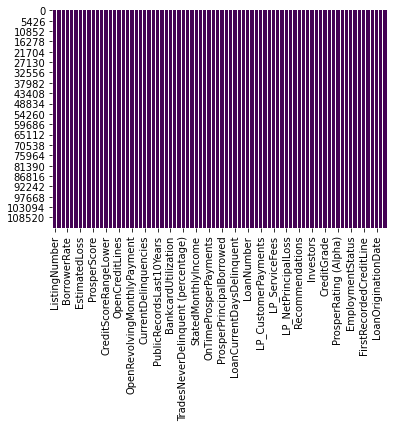

In [25]:
# Visualizing the missing values
sns.heatmap(result.isnull(),cbar=False,cmap='viridis')

In [26]:
print(result.isnull().values.sum())

0


We saw that our dataset is now has no any missing values. 

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

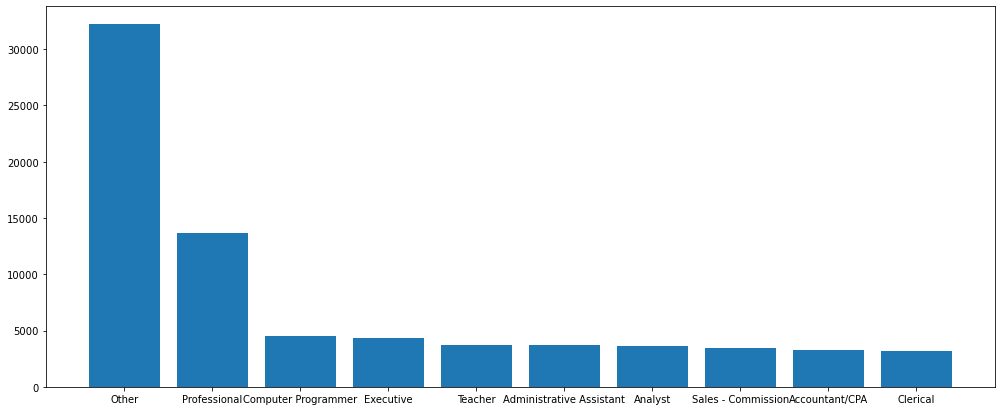

In [27]:
plt.figure(figsize=(17,7))
plt.bar(list(result['Occupation'].value_counts()[0:10].keys()),list(result['Occupation'].value_counts()[0:10]))
plt.bar

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


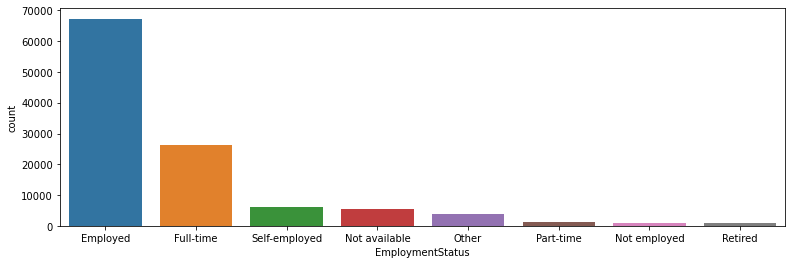

In [28]:
plt.figure(figsize = (13,4))
sns.countplot(df.EmploymentStatus.dropna(), order = df.EmploymentStatus.value_counts().index);

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


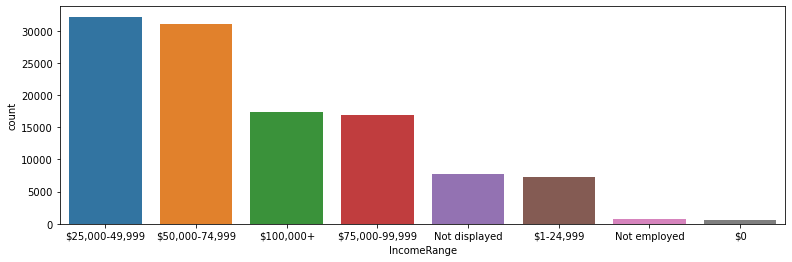

In [29]:
plt.figure(figsize = (13,4))
sns.countplot(df.IncomeRange.dropna(), order = df.IncomeRange.value_counts().index);

From this bar graph we see that loan is given to most of the people who are employed then to full time and self employed respectively. And most of the people have income range in between $25,000-49,999.

<AxesSubplot:>

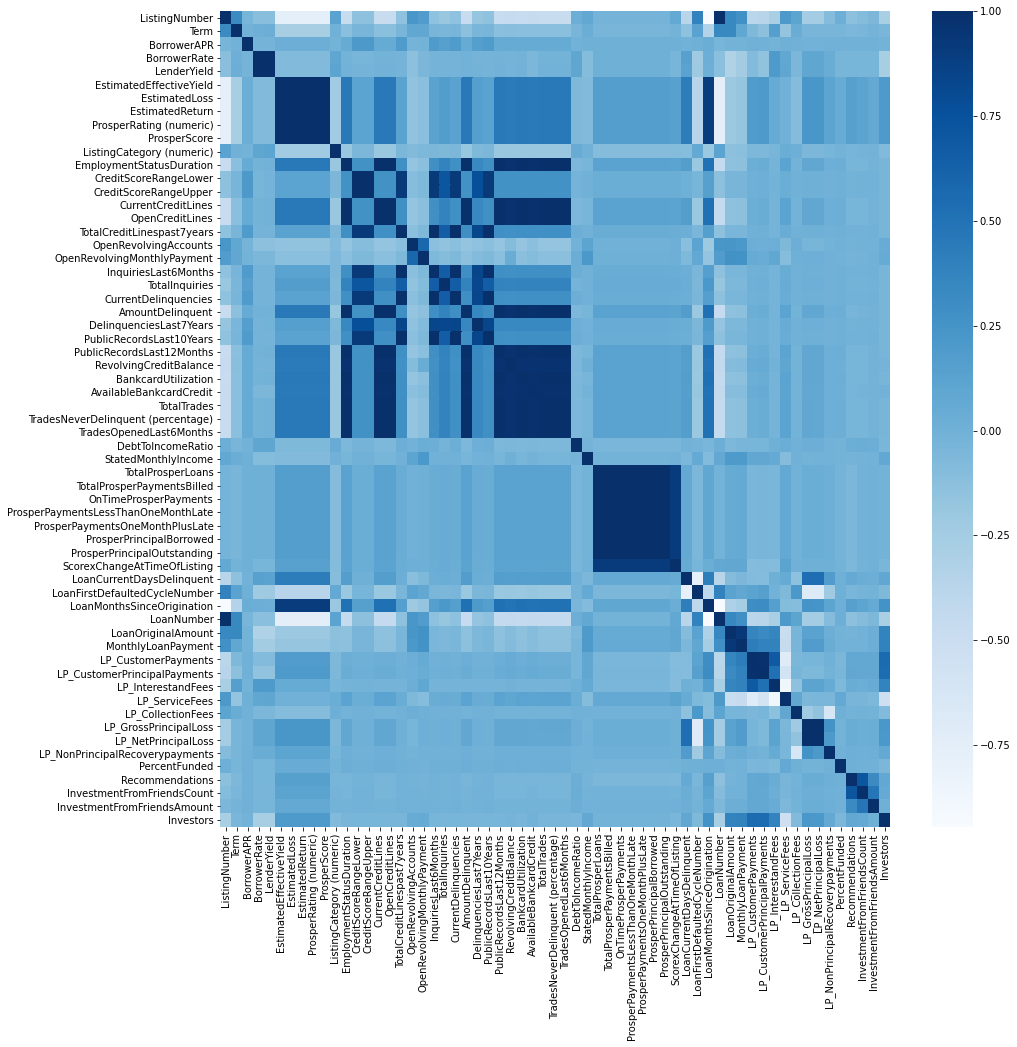

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(result.corr(),cbar=True,cmap='Blues')

There is positive correlation between variable Loan number and lisiting number.There is positive correlation between variable employment status duration total traders, availble bank card credit. There is negative relationship between borrower rate and borrower APR.

(array([9.4650e+04, 8.0600e+02, 5.0180e+03, 1.1992e+04, 2.6500e+02,
        5.0000e+00, 3.1300e+02, 3.6300e+02, 3.0400e+02, 2.2100e+02]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

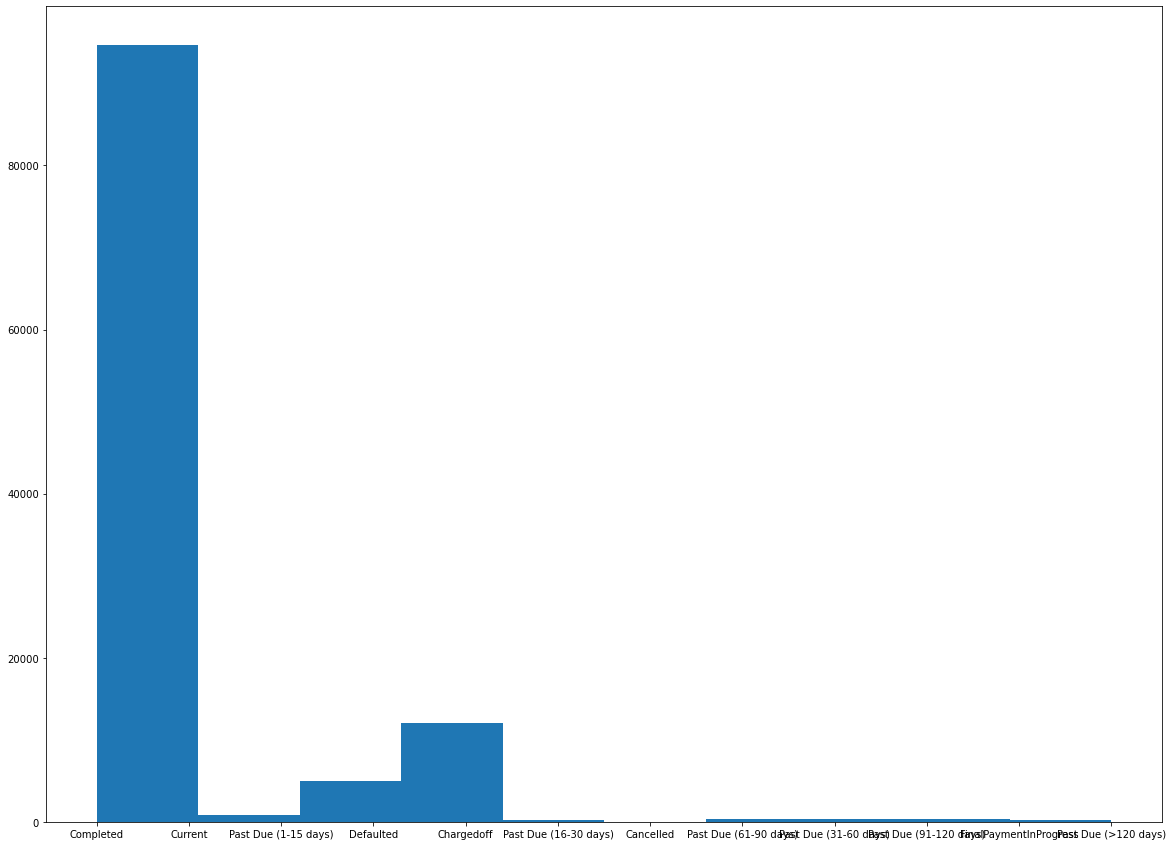

In [31]:
plt.figure(figsize=(20,15))
plt.hist(result['LoanStatus'])

There are so much low credit grade such as C and D it does not lead to higher amount of deliquency. Because most number of loan status is completed. 

(array([6.3000e+01, 1.1966e+04, 2.5660e+04, 2.6902e+04, 1.8819e+04,
        1.7516e+04, 1.0953e+04, 2.0500e+03, 2.0000e+00, 6.0000e+00]),
 array([0.     , 0.04975, 0.0995 , 0.14925, 0.199  , 0.24875, 0.2985 ,
        0.34825, 0.398  , 0.44775, 0.4975 ]),
 <BarContainer object of 10 artists>)

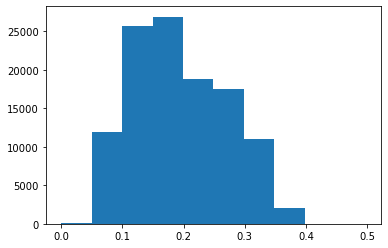

In [32]:
plt.hist(result['BorrowerRate'])

Therefore highest number of borrower rate is between 0.1 and 0.2.

(array([1.4700e+02, 1.2390e+04, 2.6436e+04, 2.7063e+04, 1.9921e+04,
        1.5778e+04, 1.2169e+04, 2.5000e+01, 5.0000e+00, 3.0000e+00]),
 array([-0.01   ,  0.04025,  0.0905 ,  0.14075,  0.191  ,  0.24125,
         0.2915 ,  0.34175,  0.392  ,  0.44225,  0.4925 ]),
 <BarContainer object of 10 artists>)

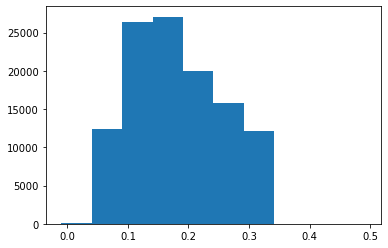

In [33]:
plt.hist(result['LenderYield'])

The highest number of Lender yeild is between 0.1 and 0.2. 

Text(0, 0.5, 'MonthlyLoanPayment')

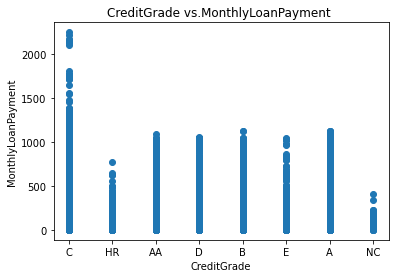

In [34]:
plt.scatter(result.CreditGrade,result.MonthlyLoanPayment)
plt.title('CreditGrade vs.MonthlyLoanPayment ')
plt.xlabel('CreditGrade')
plt.ylabel('MonthlyLoanPayment')

Higher credit grade does not lead to the higher monthly loan payment. 

Text(0, 0.5, 'LoanStatus')

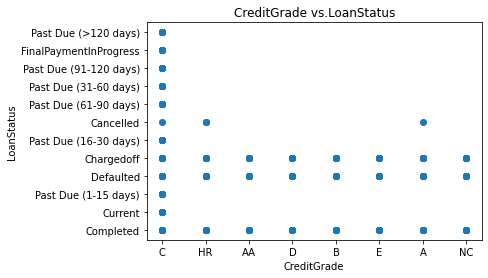

In [35]:
plt.scatter(result.CreditGrade,result.LoanStatus)
plt.title('CreditGrade vs.LoanStatus')
plt.xlabel('CreditGrade')
plt.ylabel('LoanStatus')

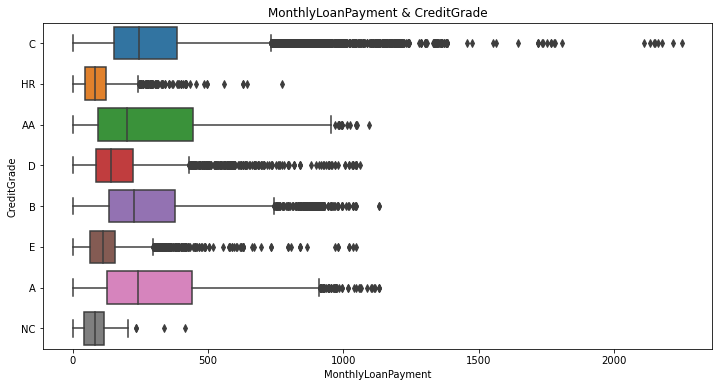

In [36]:
plt.figure(figsize = [12, 6])
sns.boxplot(data=result,x='MonthlyLoanPayment',y='CreditGrade');
plt.xlabel('MonthlyLoanPayment');
plt.ylabel('CreditGrade');
plt.title('MonthlyLoanPayment & CreditGrade');



###### CreditGrade 'HR' & 'E' has low MonthlyLoanPayment as compared to others.

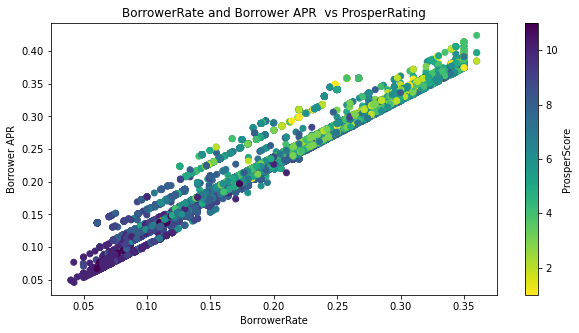

In [37]:
plt.figure(figsize = [10, 5])
plt.scatter(data=df,x='BorrowerRate',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('BorrowerRate')
plt.ylabel('Borrower APR')
plt.title('BorrowerRate and Borrower APR  vs ProsperRating');


###### This chart confirms the relations between BorrowerAPR and BorrowerRate, they have strong positive relationship
####### In addition, it shows that most of loans with lower BorrowerAPR & BorrowerRate have higher ProsperScore and visa-versa

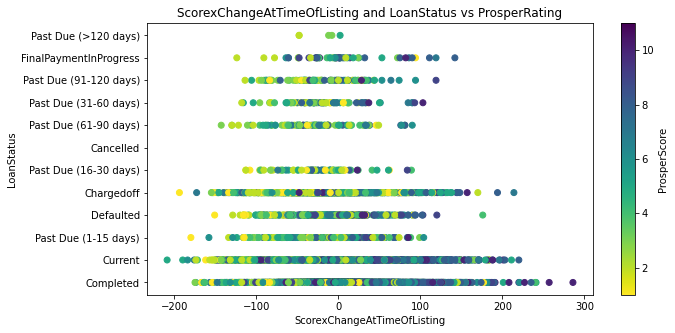

In [38]:
##### ScorexChangeAtTimeOfListing and LoanStatus vs ProsperRating'

plt.figure(figsize = [10, 5])
plt.scatter(data=df,x='ScorexChangeAtTimeOfListing',y = 'LoanStatus',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('ScorexChangeAtTimeOfListing')
plt.ylabel('LoanStatus')
plt.title('ScorexChangeAtTimeOfListing and LoanStatus vs ProsperRating');


#### Negative Relation between LoanStatus & ScorexChangeAtTimeOfListing and many LoanStatus has lower prosper score.


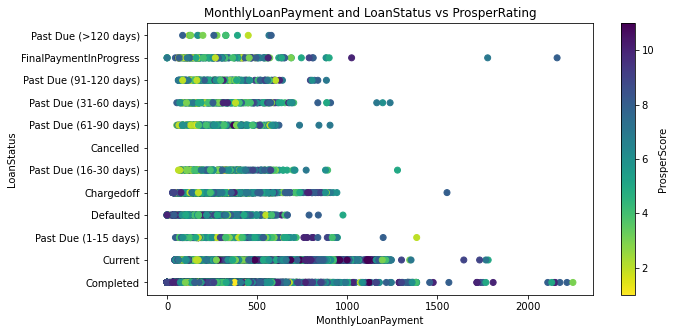

In [39]:
##### 'MonthlyLoanPayment and LoanStatus vs ProsperRating'

plt.figure(figsize = [10, 5])
plt.scatter(data=df,x='MonthlyLoanPayment',y = 'LoanStatus',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('LoanStatus')
plt.title('MonthlyLoanPayment and LoanStatus vs ProsperRating');

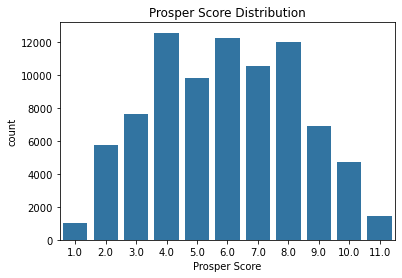

In [40]:
#Prosper Score Distribution
base_color = sns.color_palette()[0]
sns.countplot(data=df,x= 'ProsperScore',color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');


#### Prosper score of value 4 and 6 and 8 are the most common.

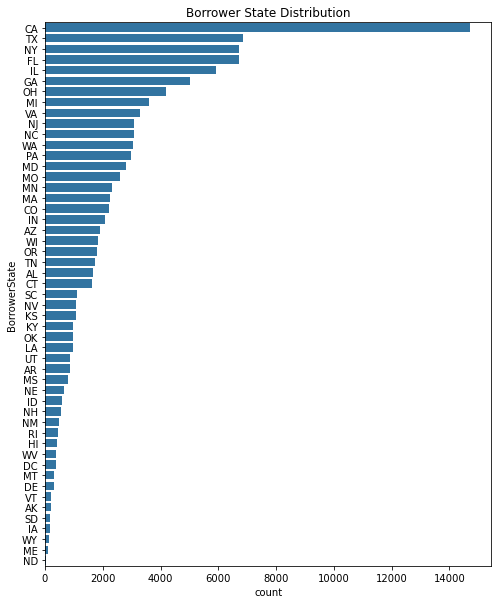

In [41]:
#Borrower State Distrobution
cat_order = df.BorrowerState.value_counts().index
plt.figure(figsize=[8, 10])
sns.countplot(data=df,y='BorrowerState',color=base_color, order=cat_order);
plt.title('Borrower State Distribution');


###### States California, Texas and New York have the 3 biggest numbers of loans originated in that period of time.

In [42]:
# Changing Loan orgination date into date time format
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

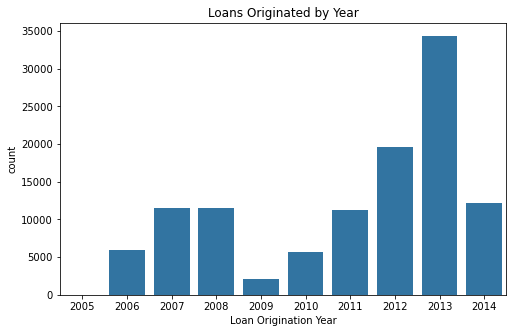

In [43]:
# Loan Origination by Year
plt.figure(figsize=[8, 5])
sns.countplot(data=df,x=df['LoanOriginationDate'].dt.year,color=base_color)
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

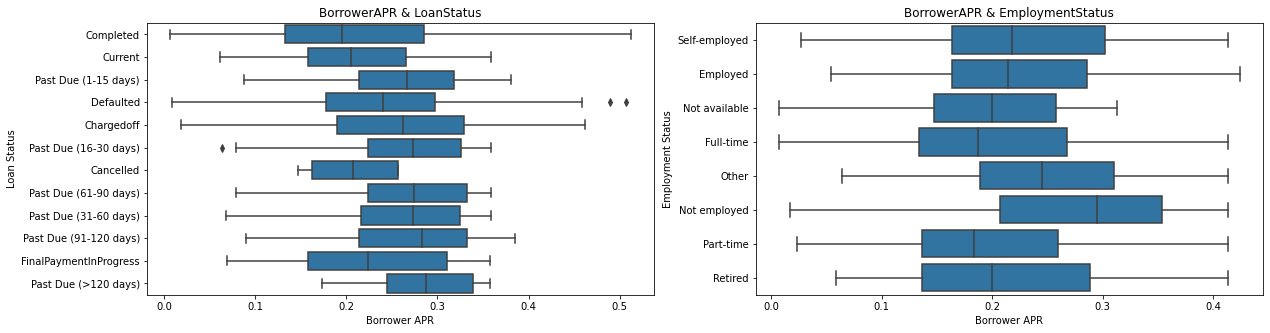

In [44]:
# Borrower APR vs Status of Loan and  Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sns.boxplot(data=df,x='BorrowerAPR',y='LoanStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Loan Status');
plt.title('BorrowerAPR & LoanStatus');

plt.subplot(1, 2, 2)
sns.boxplot(data=df,x='BorrowerAPR',y='EmploymentStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Employment Status');
plt.title('BorrowerAPR & EmploymentStatus');


##### On the left: Current and completed loans have lower rate than the past-due loans
####### On the right: Employed people have lower rates than not employed

In [45]:
result['LoanStatus']

0                      Completed
1                        Current
2                      Completed
3                        Current
4                        Current
                   ...          
113932                   Current
113933    FinalPaymentInProgress
113934                   Current
113935                 Completed
113936                   Current
Name: LoanStatus, Length: 113937, dtype: object

In [46]:
### Dropping column
result.drop(['ListingCreationDate','LoanOriginationDate','GroupKey','CreditGrade','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)',
        'TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ListingKey'], axis =1, inplace = True)
result.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,...,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,193129,36,0.16516,0.1580,0.1380,600554.0,0,2.0,640.0,659.0,...,C,CO,Other,Self-employed,41:46.8,11-10-2001 00:00,"$25,000-49,999",E33A3400205839220442E84,Q3 2007,1F3E3376408759268057EDA
1,1209647,36,0.12016,0.0920,0.0820,7.0,2,44.0,680.0,699.0,...,A,CO,Professional,Employed,27-02-2014 08:28,18-03-1996 00:00,"$50,000-74,999",9E3B37071505919926B1D82,Q1 2014,1D13370546739025387B2F4
2,81716,36,0.28269,0.2750,0.2400,600554.0,0,600554.0,480.0,499.0,...,C,GA,Other,Not available,09:10.1,27-07-2002 00:00,Not displayed,6954337960046817851BCB2,Q1 2007,5F7033715035555618FA612
3,658116,36,0.12528,0.0974,0.0874,9.0,16,113.0,800.0,819.0,...,A,GA,Skilled Labor,Employed,22-10-2012 11:02,28-02-1983 00:00,"$25,000-49,999",A0393664465886295619C51,Q4 2012,9ADE356069835475068C6D2
4,909464,36,0.24614,0.2085,0.1985,4.0,2,44.0,680.0,699.0,...,D,MN,Executive,Employed,14-09-2013 18:38,20-02-2004 00:00,"$100,000+",A180369302188889200689E,Q3 2013,36CE356043264555721F06C


# Label Encoding 

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine','DateCreditPulled','IncomeRange','LoanKey','LoanOriginationQuarter',
       'MemberKey']

# Encode labels of multiple columns at once

result[cols] = result[cols].apply(LabelEncoder().fit_transform)

# Print head

result.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,...,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,193129,36,0.16516,0.1580,0.1380,600554.0,0,2.0,640.0,659.0,...,3,5,35,7,94242,4232,3,99945,17,10949
1,1209647,36,0.12016,0.0920,0.0820,7.0,2,44.0,680.0,699.0,...,0,5,41,0,79084,6672,4,69445,7,10180
2,81716,36,0.28269,0.2750,0.2400,600554.0,0,600554.0,480.0,499.0,...,3,10,35,2,27383,10091,6,46025,1,33587
3,658116,36,0.12528,0.0974,0.0874,9.0,16,113.0,800.0,819.0,...,0,10,50,0,65954,10291,3,70384,31,54676
4,909464,36,0.24614,0.2085,0.1985,4.0,2,44.0,680.0,699.0,...,4,23,19,0,41529,7393,2,70995,23,19348


In [48]:
result['LoanStatus']

0                      Completed
1                        Current
2                      Completed
3                        Current
4                        Current
                   ...          
113932                   Current
113933    FinalPaymentInProgress
113934                   Current
113935                 Completed
113936                   Current
Name: LoanStatus, Length: 113937, dtype: object

In [49]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 62 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingNumber                       113937 non-null  int64  
 1   Term                                113937 non-null  int64  
 2   BorrowerAPR                         113937 non-null  float64
 3   BorrowerRate                        113937 non-null  float64
 4   LenderYield                         113937 non-null  float64
 5   ProsperScore                        113937 non-null  float64
 6   ListingCategory (numeric)           113937 non-null  int64  
 7   EmploymentStatusDuration            113937 non-null  float64
 8   CreditScoreRangeLower               113937 non-null  float64
 9   CreditScoreRangeUpper               113937 non-null  float64
 10  CurrentCreditLines                  113937 non-null  float64
 11  OpenCreditLines           

In [50]:
# converting to binary data
result_one = pd.get_dummies(result["LoanStatus"])
print(result_one)

        Cancelled  Chargedoff  Completed  Current  Defaulted  \
0               0           0          1        0          0   
1               0           0          0        1          0   
2               0           0          1        0          0   
3               0           0          0        1          0   
4               0           0          0        1          0   
...           ...         ...        ...      ...        ...   
113932          0           0          0        1          0   
113933          0           0          0        0          0   
113934          0           0          0        1          0   
113935          0           0          1        0          0   
113936          0           0          0        1          0   

        FinalPaymentInProgress  Past Due (1-15 days)  Past Due (16-30 days)  \
0                            0                     0                      0   
1                            0                     0                     

In [51]:
# display result
result_two = pd.concat((result_one, result), axis=1)
result_two = result_two.drop(["LoanStatus"], axis=1)
result_two = result_two.drop(["Cancelled","Chargedoff","Current","Defaulted","FinalPaymentInProgress","FinalPaymentInProgress","Past Due (1-15 days)","Past Due (16-30 days)",
                              "Past Due (31-60 days)","Past Due (61-90 days)","Past Due (91-120 days)","Past Due (91-120 days)","Past Due (>120 days)"], axis=1)
data= result_two.rename(columns={"Completed": "LoanStatus"})
print(data)

        LoanStatus  ListingNumber  Term  BorrowerAPR  BorrowerRate  \
0                1         193129    36      0.16516        0.1580   
1                0        1209647    36      0.12016        0.0920   
2                1          81716    36      0.28269        0.2750   
3                0         658116    36      0.12528        0.0974   
4                0         909464    36      0.24614        0.2085   
...            ...            ...   ...          ...           ...   
113932           0         753087    36      0.22354        0.1864   
113933           0         537216    36      0.13220        0.1110   
113934           0        1069178    60      0.23984        0.2150   
113935           1         539056    60      0.28408        0.2605   
113936           0        1140093    36      0.13189        0.1039   

        LenderYield  ProsperScore  ListingCategory (numeric)  \
0            0.1380      600554.0                          0   
1            0.0820           7

In [52]:
data

,LoanStatus,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,...,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,1,193129,36,0.16516,0.1580,0.1380,600554.0,0,2.0,640.0,...,3,5,35,7,94242,4232,3,99945,17,10949
1,0,1209647,36,0.12016,0.0920,0.0820,7.0,2,44.0,680.0,...,0,5,41,0,79084,6672,4,69445,7,10180
2,1,81716,36,0.28269,0.2750,0.2400,600554.0,0,600554.0,480.0,...,3,10,35,2,27383,10091,6,46025,1,33587
3,0,658116,36,0.12528,0.0974,0.0874,9.0,16,113.0,800.0,...,0,10,50,0,65954,10291,3,70384,31,54676
4,0,909464,36,0.24614,0.2085,0.1985,4.0,2,44.0,680.0,...,4,23,19,0,41529,7393,2,70995,23,19348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0,753087,36,0.22354,0.1864,0.1764,5.0,1,246.0,700.0,...,3,14,23,0,40427,438,4,68416,15,16412
113933,0,537216,36,0.13220,0.1110,0.1010,8.0,7,21.0,700.0,...,0,38,41,0,8252,6242,5,43239,30,30218
113934,0,1069178,60,0.23984,0.2150,0.2050,3.0,1,84.0,700.0,...,4,43,35,0,39162,9225,3,97162,32,5515
113935,1,539056,60,0.28408,0.2605,0.2505,5.0,2,94.0,680.0,...,3,10,22,1,41831,580,3,38623,30,57646


In [53]:
data

,LoanStatus,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,...,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,1,193129,36,0.16516,0.1580,0.1380,600554.0,0,2.0,640.0,...,3,5,35,7,94242,4232,3,99945,17,10949
1,0,1209647,36,0.12016,0.0920,0.0820,7.0,2,44.0,680.0,...,0,5,41,0,79084,6672,4,69445,7,10180
2,1,81716,36,0.28269,0.2750,0.2400,600554.0,0,600554.0,480.0,...,3,10,35,2,27383,10091,6,46025,1,33587
3,0,658116,36,0.12528,0.0974,0.0874,9.0,16,113.0,800.0,...,0,10,50,0,65954,10291,3,70384,31,54676
4,0,909464,36,0.24614,0.2085,0.1985,4.0,2,44.0,680.0,...,4,23,19,0,41529,7393,2,70995,23,19348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0,753087,36,0.22354,0.1864,0.1764,5.0,1,246.0,700.0,...,3,14,23,0,40427,438,4,68416,15,16412
113933,0,537216,36,0.13220,0.1110,0.1010,8.0,7,21.0,700.0,...,0,38,41,0,8252,6242,5,43239,30,30218
113934,0,1069178,60,0.23984,0.2150,0.2050,3.0,1,84.0,700.0,...,4,43,35,0,39162,9225,3,97162,32,5515
113935,1,539056,60,0.28408,0.2605,0.2505,5.0,2,94.0,680.0,...,3,10,22,1,41831,580,3,38623,30,57646


Here Loan Status 1= Completed and 0=not completed 

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 62 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   LoanStatus                          113937 non-null  uint8  
 1   ListingNumber                       113937 non-null  int64  
 2   Term                                113937 non-null  int64  
 3   BorrowerAPR                         113937 non-null  float64
 4   BorrowerRate                        113937 non-null  float64
 5   LenderYield                         113937 non-null  float64
 6   ProsperScore                        113937 non-null  float64
 7   ListingCategory (numeric)           113937 non-null  int64  
 8   EmploymentStatusDuration            113937 non-null  float64
 9   CreditScoreRangeLower               113937 non-null  float64
 10  CreditScoreRangeUpper               113937 non-null  float64
 11  CurrentCreditLines        

In [55]:
data.columns

Index(['LoanStatus', 'ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome',
       'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent',
       'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination',
       'LoanNumber', 'LoanOriginalAmount', 'MonthlyLoanPayment',
       'L

# Spliting data into training and testing data

In [56]:
### Building a Model
X = data.drop(columns='LoanStatus', axis=1)
Y = data['LoanStatus']

In [57]:
X

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,...,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationQuarter,MemberKey
0,193129,36,0.16516,0.1580,0.1380,600554.0,0,2.0,640.0,659.0,...,3,5,35,7,94242,4232,3,99945,17,10949
1,1209647,36,0.12016,0.0920,0.0820,7.0,2,44.0,680.0,699.0,...,0,5,41,0,79084,6672,4,69445,7,10180
2,81716,36,0.28269,0.2750,0.2400,600554.0,0,600554.0,480.0,499.0,...,3,10,35,2,27383,10091,6,46025,1,33587
3,658116,36,0.12528,0.0974,0.0874,9.0,16,113.0,800.0,819.0,...,0,10,50,0,65954,10291,3,70384,31,54676
4,909464,36,0.24614,0.2085,0.1985,4.0,2,44.0,680.0,699.0,...,4,23,19,0,41529,7393,2,70995,23,19348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,5.0,1,246.0,700.0,719.0,...,3,14,23,0,40427,438,4,68416,15,16412
113933,537216,36,0.13220,0.1110,0.1010,8.0,7,21.0,700.0,719.0,...,0,38,41,0,8252,6242,5,43239,30,30218
113934,1069178,60,0.23984,0.2150,0.2050,3.0,1,84.0,700.0,719.0,...,4,43,35,0,39162,9225,3,97162,32,5515
113935,539056,60,0.28408,0.2605,0.2505,5.0,2,94.0,680.0,699.0,...,3,10,22,1,41831,580,3,38623,30,57646


In [58]:
Y

0         1
1         0
2         1
3         0
4         0
         ..
113932    0
113933    0
113934    0
113935    1
113936    0
Name: LoanStatus, Length: 113937, dtype: uint8

In [59]:
### Splitting the data into training data & Testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(113937, 61) (91149, 61) (22788, 61)


# Feature Selection

In [61]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([2.02377328e-01, 5.53673224e-02, 2.08057995e-01, 1.69547318e-01,
       1.65671425e-01, 8.55364316e-02, 5.31831691e-02, 1.66477125e-02,
       2.21443159e-02, 2.01665084e-02, 1.31996486e-02, 1.65750797e-02,
       6.37818417e-03, 8.22997695e-03, 2.09847491e-02, 6.07795511e-03,
       4.48446609e-03, 7.62044991e-04, 1.15205867e-02, 1.42116411e-04,
       2.57850331e-03, 1.21263850e-02, 1.88361477e-02, 1.92818665e-02,
       1.61312084e-02, 1.55548415e-02, 1.32070448e-02, 1.13595170e-02,
       1.35488618e-02, 4.78607942e-03, 2.00428551e-02, 7.58031960e-02,
       7.39640304e-02, 1.98827763e-01, 2.01883891e-01, 6.01123717e-02,
       1.39704356e-01, 2.38560052e-01, 5.58479506e-01, 7.67774447e-02,
       7.52458532e-02, 7.32283778e-03, 6.63130069e-02, 6.60027149e-02,
       1.26134602e-02, 8.71781204e-03, 5.03819068e-03, 3.98893343e-03,
       5.32345620e-03, 7.95200790e-02, 3.80008680e-01, 2.94729092e-02,
       8.59350650e-03, 9.05578212e-03, 9.22522513e-02, 2.03317520e-01,
      

In [62]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

LP_CustomerPrincipalPayments    0.558480
ClosedDate                      0.380009
LP_CustomerPayments             0.238560
BorrowerAPR                     0.208058
DateCreditPulled                0.203318
                                  ...   
InvestmentFromFriendsCount      0.003989
LoanKey                         0.002755
PublicRecordsLast10Years        0.002579
CurrentDelinquencies            0.000762
DelinquenciesLast7Years         0.000142
Length: 61, dtype: float64

<AxesSubplot:>

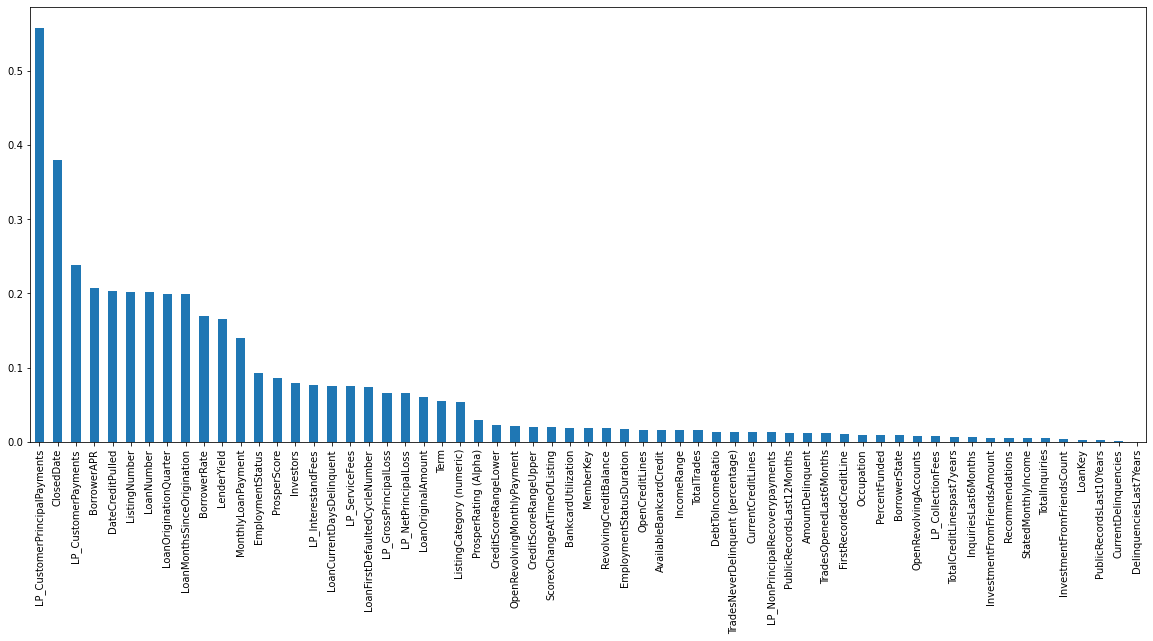

In [63]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [64]:
from sklearn.feature_selection import SelectKBest

In [65]:
#Now we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, Y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['ListingNumber', 'BorrowerAPR', 'BorrowerRate',
       'LoanMonthsSinceOrigination', 'LoanNumber', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'ClosedDate', 'DateCreditPulled',
       'LoanOriginationQuarter'],
      dtype='object')

In [66]:
X_train_new = sel_five_cols.transform(X_train)
X_test_new =  sel_five_cols.transform(X_test)

# Standardizing data

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_new)
X_test_std = scaler.transform(X_test_new)

# Model creation
Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train_std, Y_train)

LogisticRegression()

In [70]:
y_pred = clf.predict(X_test_std)

In [71]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 90.85%


Text(0.5, 1.0, 'Confusion Matrix')

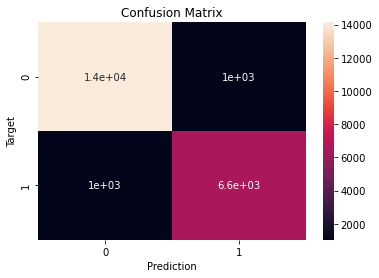

In [72]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [73]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     15179
           1       0.86      0.86      0.86      7609

    accuracy                           0.91     22788
   macro avg       0.90      0.90      0.90     22788
weighted avg       0.91      0.91      0.91     22788



In [75]:
confusion_matrix(Y_test,y_pred)

array([[14134,  1045],
       [ 1039,  6570]], dtype=int64)

In [76]:
(14281+6794)/(14281+898+815+6794)

0.9248288572933123

92% ACCURACY

# Decision Tree Algorithm (98% Accuracy)

In [77]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy")

In [78]:
model.fit(X_train_std, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [79]:
y_pred = model.predict(X_test_std)

In [80]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 98.22%


In [81]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15179
           1       0.97      0.98      0.97      7609

    accuracy                           0.98     22788
   macro avg       0.98      0.98      0.98     22788
weighted avg       0.98      0.98      0.98     22788



# Naives Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std, Y_train)

GaussianNB()

In [84]:
y_pred = gnb.predict(X_test_std)

In [85]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 72.61277865543269


# Save the Model For Deployment

In [86]:
model = GaussianNB()

In [87]:
model.fit(X_train_std, Y_train)

GaussianNB()

In [88]:
y_pred = model.predict(X_test_std)

In [89]:
score = accuracy_score(Y_test, y_pred)
print("Accuracy: ", score)

Accuracy:  0.7261277865543269


In [90]:
import pickle 
pickle_out = open("model.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [91]:
#### Logistic Regression
LG_model = LogisticRegression()

In [92]:
LG_model.fit(X_train_std, Y_train)

LogisticRegression()

In [93]:
y_pred = LG_model.predict(X_test_std)

In [94]:
score = accuracy_score(Y_test, y_pred)
print("Accuracy: ", score)

Accuracy:  0.9085483587853256


In [95]:
import pickle 
pickle_out = open("LG_model.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [96]:
### Decision Tree

In [97]:
DT_model =DecisionTreeClassifier(criterion = "entropy")

In [98]:
DT_model.fit(X_train_std, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [99]:
y_pred = DT_model.predict(X_test_std)

In [100]:
score = accuracy_score(Y_test, y_pred)
print("Accuracy: ", score)

Accuracy:  0.9817008952080042


In [101]:
import pickle 
pickle_out = open("DT_model.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()